### PAPER's Figure 5

In [1]:
#############################################
#BASIC PACKAGES
import sys,time,os
from copy import deepcopy as dcopy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#############################################
#PATH TO SCRIPTS FOLDER
path = '/data/AMARINS/CMBWLxHI-CODES/scripts/'
sys.path.insert(1, path)
import cross_functions_theory      as cxft
import cross_functions_simulations as cxfs
# it's required healpy  (https://healpy.readthedocs.io/en/latest/index.html)
import handling_data               as hdata

#############################################
## MATPLOTLIB FEATURES
from matplotlib import cm
font = {'weight' : 'bold','size'   : 22}
mpl.rc('font', **font)
mpl.rc('font',   size=209)  #set defaults so that the plots are readable
mpl.rc('axes',   titlesize=20)
mpl.rc('axes',   labelsize=20)
mpl.rc('xtick',  labelsize=20)
mpl.rc('ytick',  labelsize=20)
mpl.rc('legend', fontsize =20)
mpl.rc('figure', titlesize=20)
mpl.rc('text',   usetex=True)
## FURTHER MATPLOTLIB FEATURES
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
#from matplotlib.colors import LogNorm
#from matplotlib.ticker import LogLocator
from matplotlib.colors import ListedColormap
colors = ['#ff0000', "#41b6c4",  "olivedrab", "darkviolet"]
my_cmap = ListedColormap(colors, name="my_cmap")

In [2]:
timej  = time.time() 
###############################################################################################
prefix = 'lowz_nch30_980_1260'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
for i,ICs in enumerate(['ns2','ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')
    L0_dir         = "sim0"
    W_fg_rec       = np.loadtxt(os.path.join(dirpath_rec, L0_dir ,'filter_fg.txt' )).T#[1:,:]
    W_fg_rec_mean  = np.loadtxt(os.path.join(dirpath_rec, 'mean' ,'filter_fg_mean.txt' )).T#[1:,:]
    if not i:
        WFG_dict_lowz = {ICs: {'W_fg_rec':W_fg_rec,'W_fg_rec_mean':W_fg_rec_mean} }
    else:
        WFG_dict_lowz[ICs] = {'W_fg_rec':W_fg_rec,'W_fg_rec_mean':W_fg_rec_mean}  
    del W_fg_rec,W_fg_rec_mean
###############################################################################################
prefix = 'highz_nch70_350_1050'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
for i,ICs in enumerate(['ns2','ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')
    L0_dir         = "sim0"
    W_fg_rec       = np.loadtxt(os.path.join(dirpath_rec, L0_dir ,'filter_fg.txt' )).T#[1:,:]
    W_fg_rec_mean  = np.loadtxt(os.path.join(dirpath_rec, 'mean' ,'filter_fg_mean.txt' )).T#[1:,:]
    if not i:
        WFG_dict_highz = {ICs: {'W_fg_rec':W_fg_rec,'W_fg_rec_mean':W_fg_rec_mean} }
    else:
        WFG_dict_highz[ICs] = {'W_fg_rec':W_fg_rec,'W_fg_rec_mean':W_fg_rec_mean}  
    del W_fg_rec,W_fg_rec_mean
###############################################################################################
print('Processing time: {0:.4f} seg'.format(time.time()-timej))      

Processing time: 0.0050 seg


'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters.png'

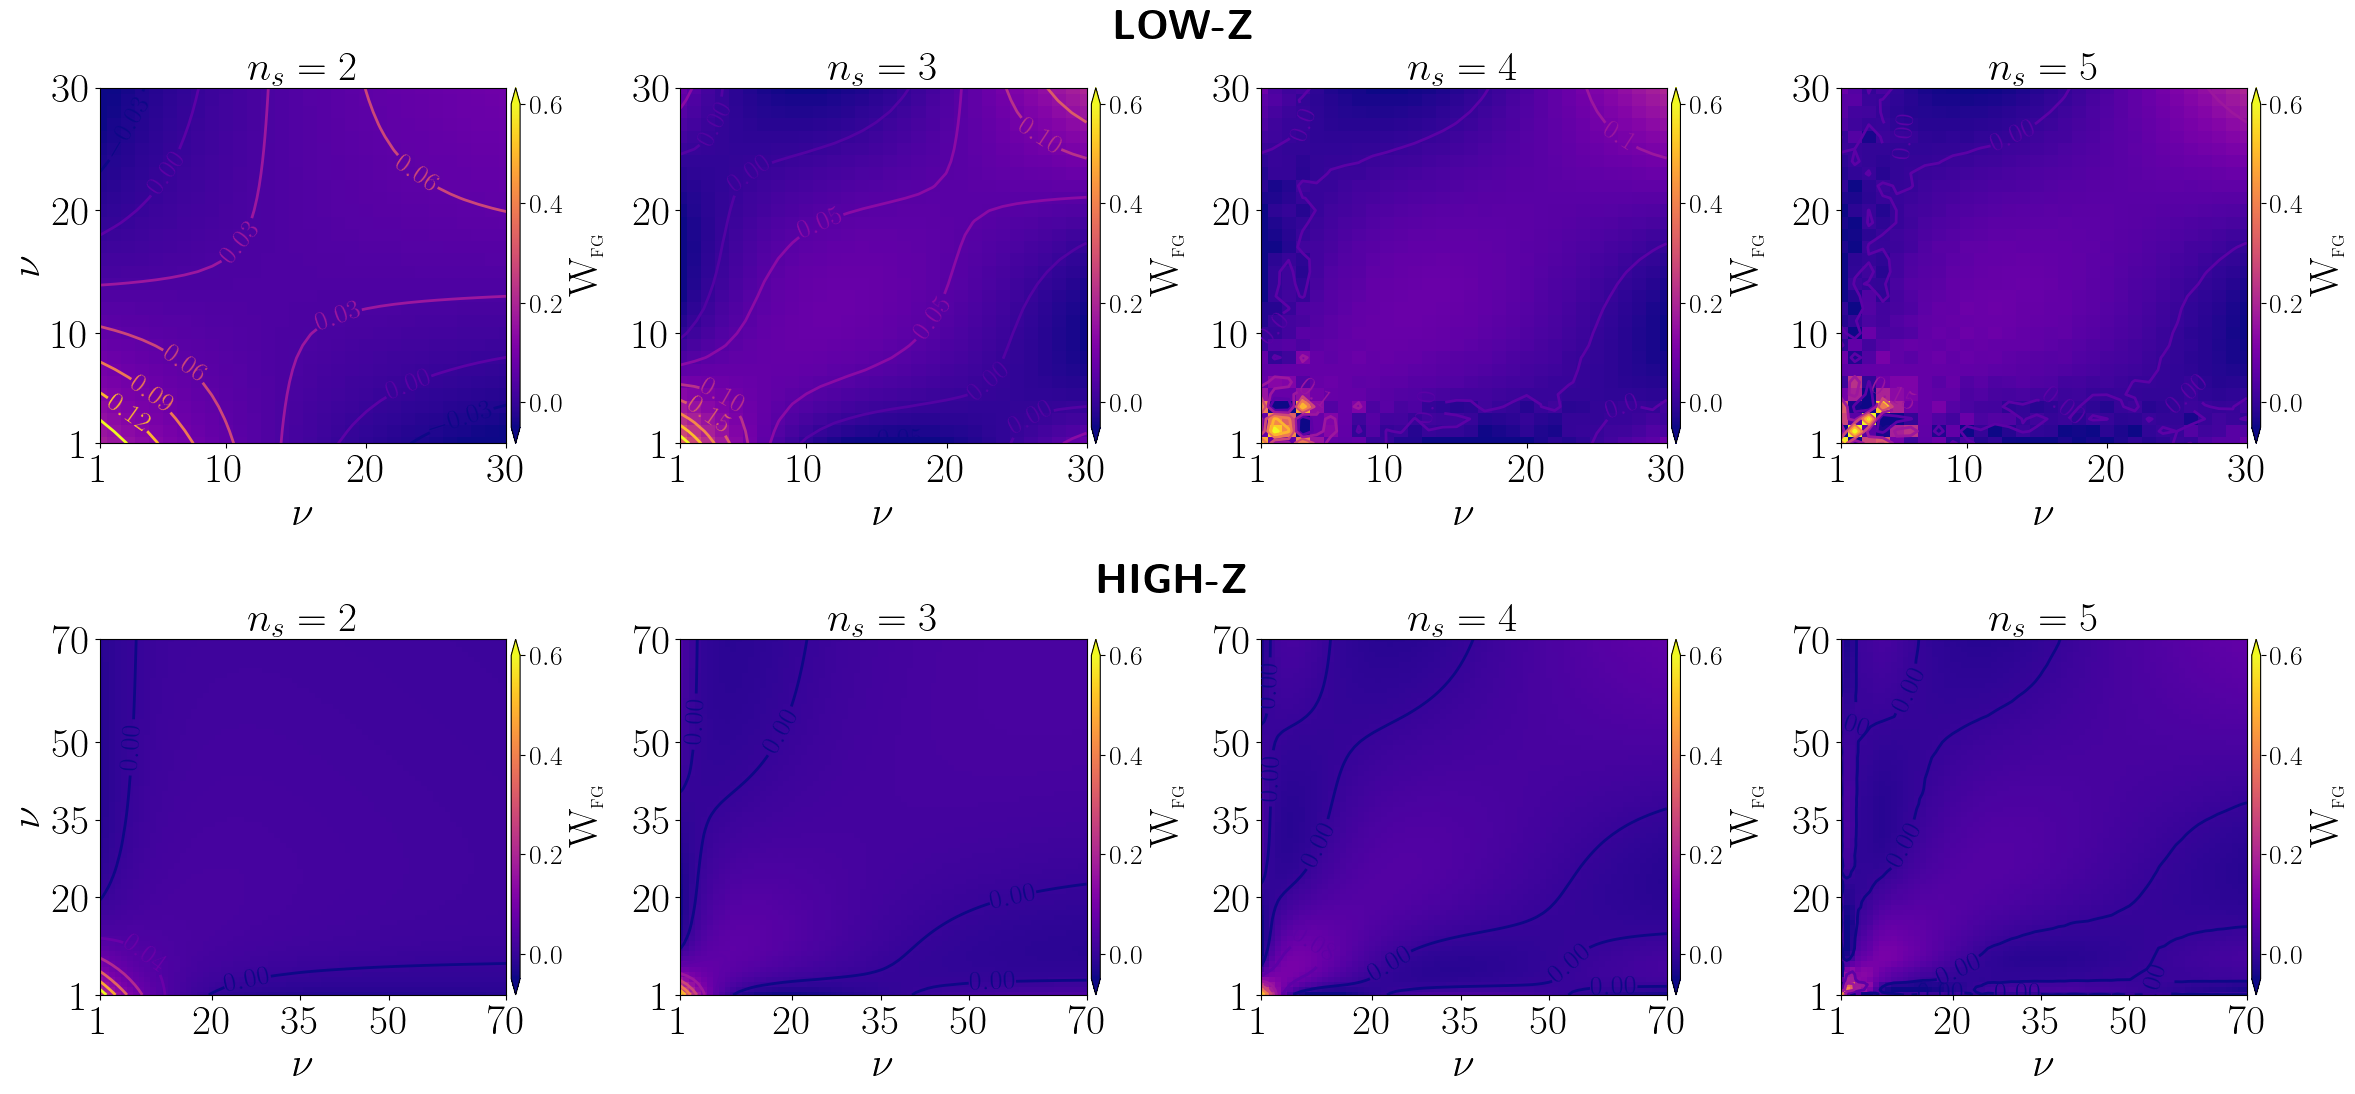

In [3]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),2
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.9, wspace=0.2,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_lowz)
cticks   = [1,10,20,30]
CMAP = 'plasma'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[0,ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])
    x   = np.arange(iWfg.shape[0])+1
    y   = np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP,    vmin=-0.05, vmax=0.6)
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right")
    cbar.set_label(label=r'$\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.tick_params(axis='both', labelsize=30)
axes[0,1].text(x=32, y=34, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
############################################################################
WFG_dict = dcopy(WFG_dict_highz)
cticks   = [1,20,35,50,70]
CMAP = 'plasma'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[1,ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])
    x   = np.arange(iWfg.shape[0])+1
    y   = np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP,    vmin=-0.05, vmax=0.6)
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right")
    cbar.set_label(label=r'$\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.tick_params(axis='both', labelsize=30)
axes[1,1].text(x=72, y=79, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
axes[0,0].set_ylabel(r'$\nu$', fontsize=30)
axes[1,0].set_ylabel(r'$\nu$', fontsize=30)
###########################################################
pathname ="/data/AMARINS/CMBWLxHI-CODES/images/FG_filters.png"
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_diff.png'

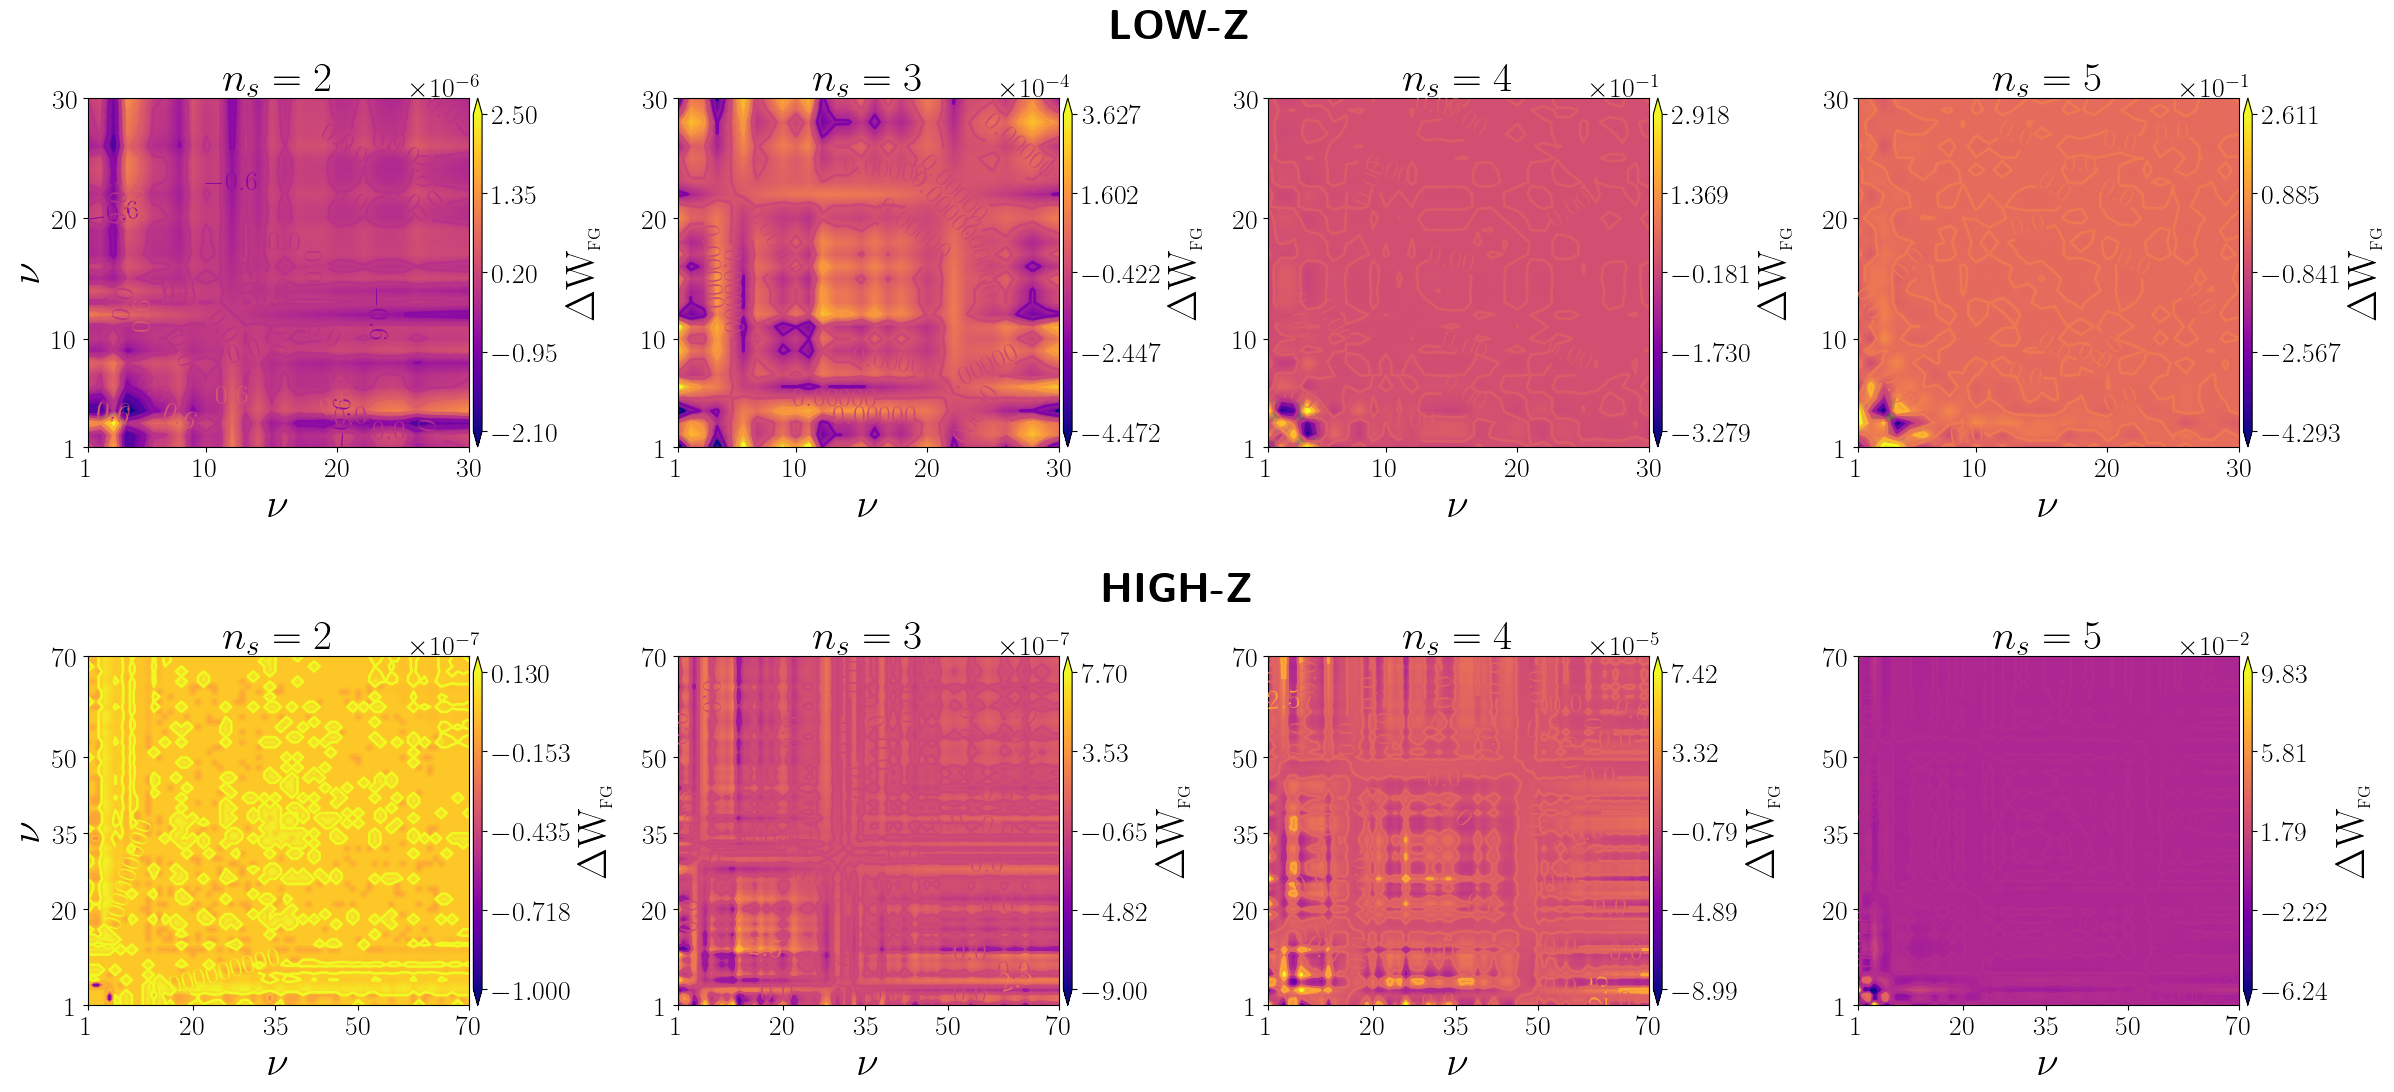

In [4]:
savefigs = False
############################################################################
ncols,nrows = len(WFG_dict.keys()),2
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.9, wspace=0.3,hspace=0.6)
############################################################################
WFG_dict = dcopy(WFG_dict_lowz)
cticks   = [1,10,20,30]
CMAP = 'plasma'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[0,ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec']-WFG_dict[ins]['W_fg_rec_mean'])
    x   = np.arange(iWfg.shape[0])+1
    y   = np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP, shading='gouraud')
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    ########
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right",format='%.1f')
    cbar.set_label(label=r'$\Delta\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ########
    cbar.set_ticks(np.linspace(iWfg.min(), iWfg.max(), 5))
    cbar.formatter = ScalarFormatter(useMathText=True)
    cbar.formatter.set_scientific(True)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.update_ticks()
    ########
axes[0,1].text(x=34, y=35, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
############################################################################
WFG_dict = dcopy(WFG_dict_highz)
cticks   = [1,20,35,50,70]
CMAP = 'plasma'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[1,ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec']-WFG_dict[ins]['W_fg_rec_mean'])
    x   = np.arange(iWfg.shape[0])+1
    y   = np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP, shading='gouraud')
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    ########
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right",format='%.1f')
    cbar.set_label(label=r'$\Delta\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ########
    cbar.set_ticks(np.linspace(iWfg.min(), iWfg.max(), 5))
    cbar.formatter = ScalarFormatter(useMathText=True)
    cbar.formatter.set_scientific(True)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.update_ticks()
    ########
axes[1,1].text(x=78, y=81, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
axes[0,0].set_ylabel(r'$\nu$', fontsize=30)
axes[1,0].set_ylabel(r'$\nu$', fontsize=30)
###########################################################
pathname ="/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_diff.png"
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

## PLOTS range constrained

### PAPER's Figure 8

#### - Row 20

'/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch19__17_23.png'

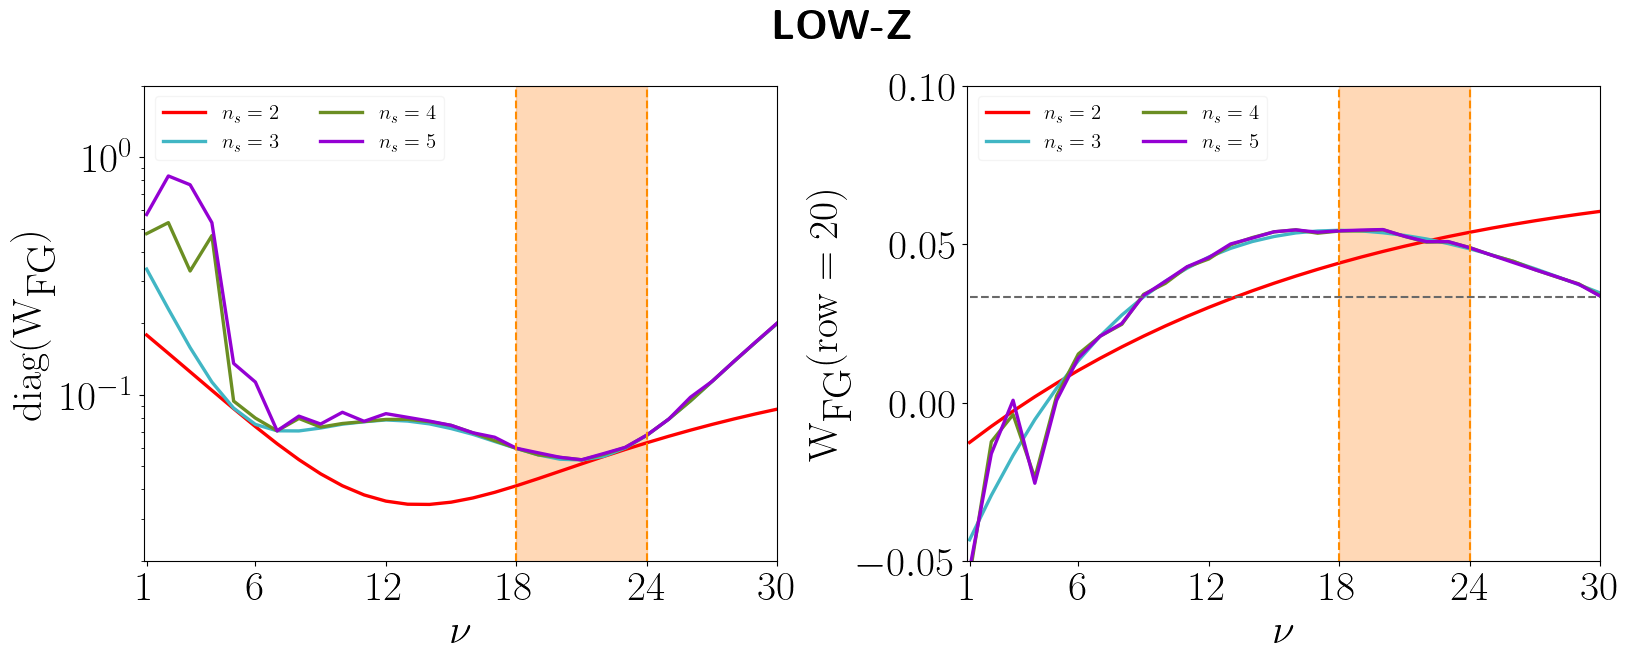

In [5]:
savefigs = True
############################################################################
i=19 ##row
nch    = 30
nu_min = 17
nu_max = 23
#
cticks = [1,6,12,18,24,30]
#
bins_lowz = np.arange(nch)[nu_min:nu_max+1]
WFG_dict = dcopy(WFG_dict_lowz)
####################################################################
fig, axes = plt.subplots(1,2)#, figsize=(18,6))
plt.subplots_adjust(top=1.1,right=2.4, wspace=0.3, hspace=0.35)
ax = axes[0]
############
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1,np.diag(iWfg),lw=2.4, c=my_cmap(ii),label=r'$n_s ='+'{}$'.format(ins.split('ns')[1]))#,  c='purple')
ax.axvline(x=bins_lowz.min()+1, color='darkorange', ls='dashed')
ax.axvline(x=bins_lowz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_lowz+1, -0.07, 2, color='C1', alpha=0.3)    
####    
ax.set_xscale('linear'); ax.set_yscale('log')
ax.set_xlim(0.9,30)
ax.set_ylim(2e-2,2)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{diag(W}_{\textrm{FG}})$', fontsize=30)
ax.set_xlabel(r'$\nu$', fontsize=30)
ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####################################################################
ax = axes[1]
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1, iWfg[i,:]  , label=r'$n_s ='+'{}$'.format( ins.split('ns')[1]),  c=my_cmap(ii), lw=2.4)
ax.plot(np.arange(nch)+1, np.ones(nch)/nch, ls='dashed', c='dimgrey')    
ax.axvline(x=bins_lowz.min()+1, color='darkorange', ls='dashed')
ax.axvline(x=bins_lowz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_lowz+1, -0.08, 1, color='C1', alpha=0.3)    
####    
ax.set_xlim(0.9,30)
ax.set_ylim(-0.05,0.1)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{W}_{\textrm{FG}} (\textrm{row}' + '={})$'.format(i+1) , fontsize=30)
ax.set_xlabel(r'$\nu$', fontsize=30)
ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####
ax.text(x=-8, y=1.15e-1, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch19__17_23.png'

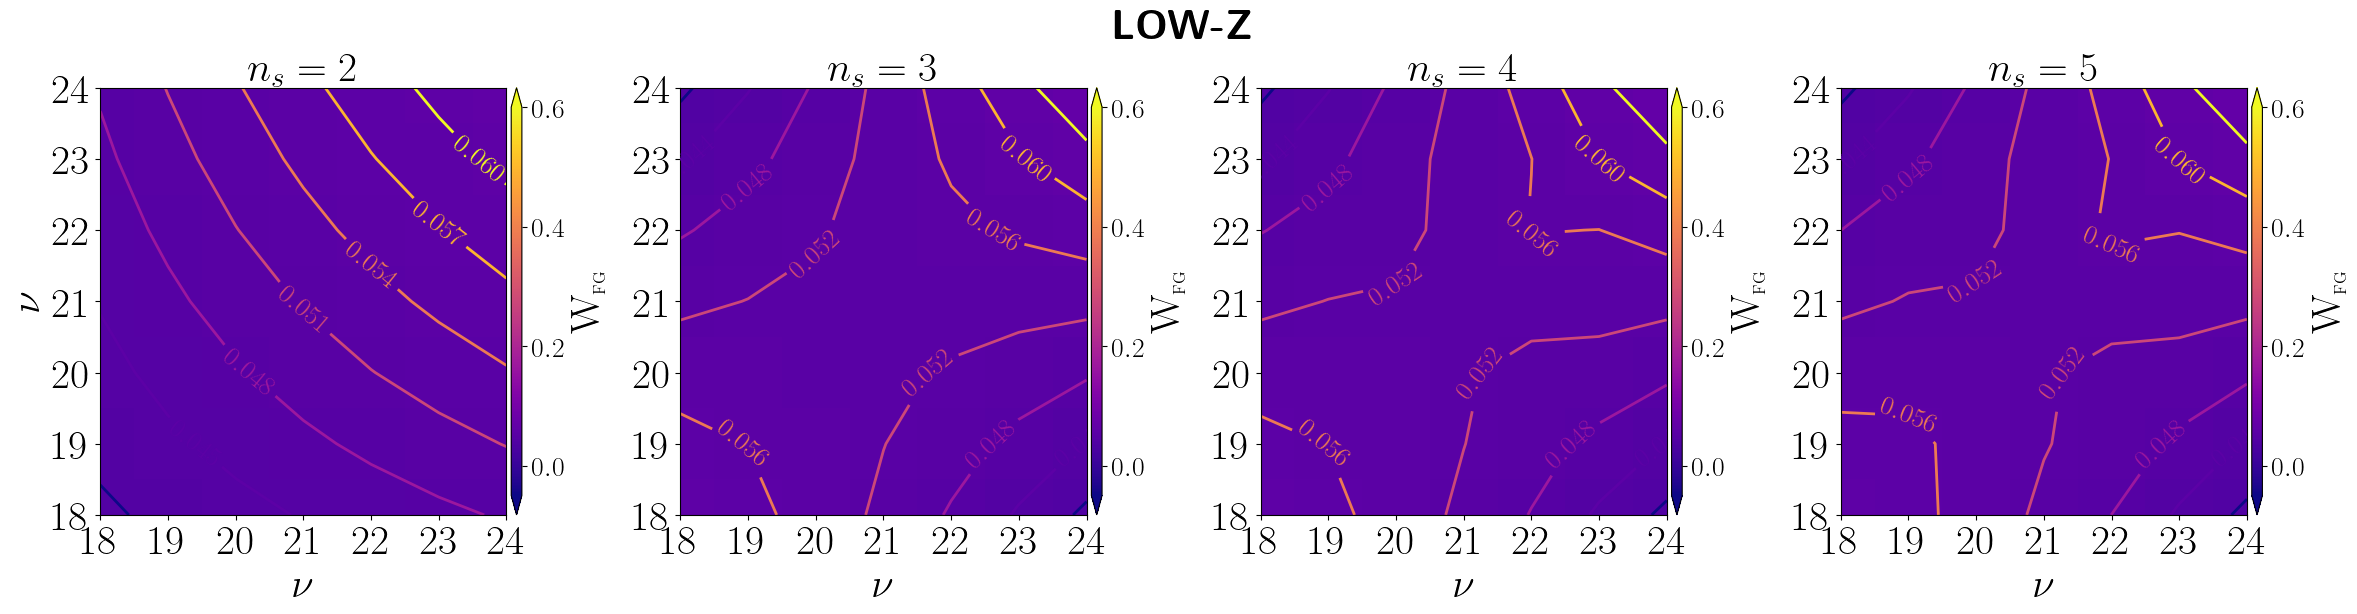

In [6]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),1
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.9, wspace=0.2,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_lowz)
cticks   = bins_lowz+1#[1,10,20,30]
CMAP = 'plasma'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])[bins_lowz.min():bins_lowz.max()+1,bins_lowz.min():bins_lowz.max()+1]
    x   = bins_lowz+1#np.arange(iWfg.shape[0])+1
    y   = bins_lowz+1#np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP,    vmin=-0.05, vmax=0.6)
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right")
    cbar.set_label(label=r'$\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.tick_params(axis='both', labelsize=30)
axes[0].set_ylabel(r'$\nu$', fontsize=30)    
axes[1].text(x=24.4, y=24.7, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

#### - Row = 25

'/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch24__24_29.png'

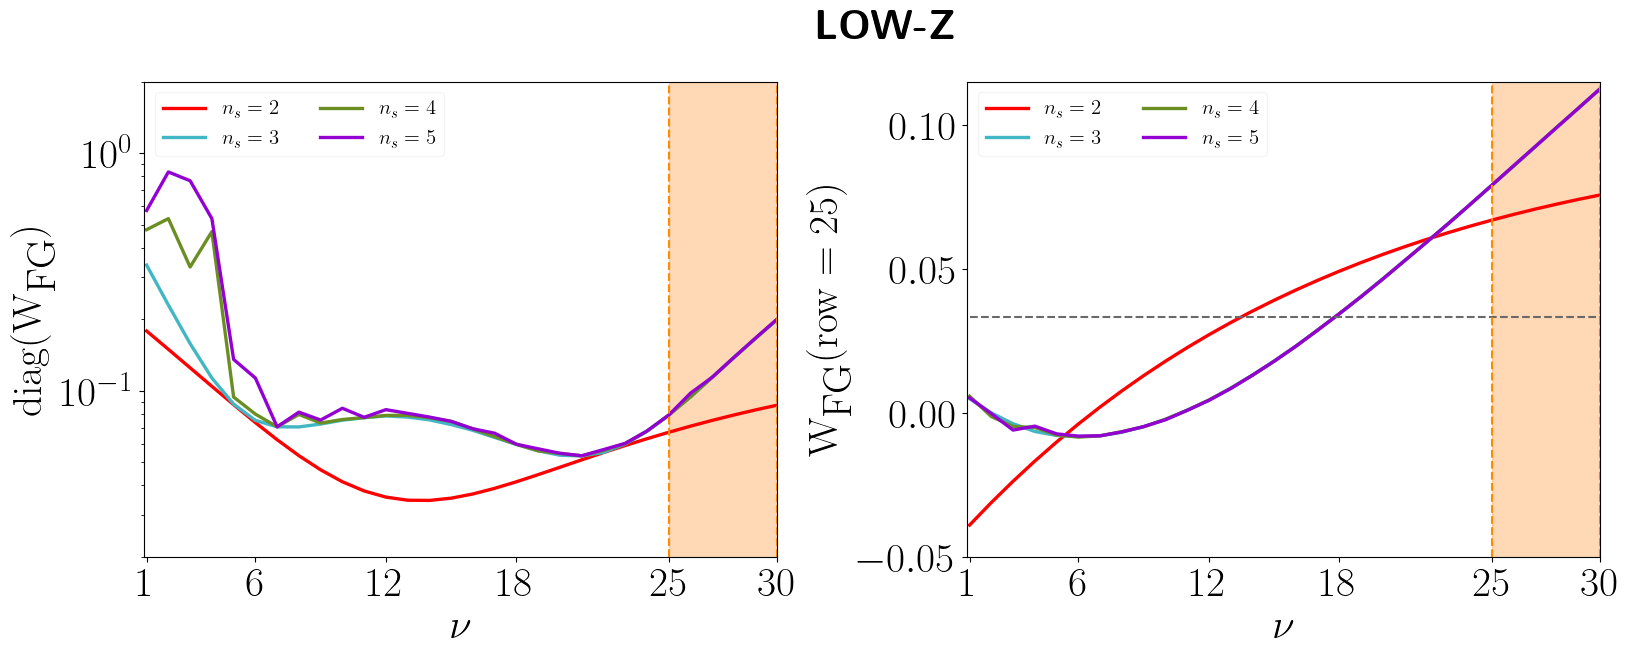

In [7]:
savefigs = True
############################################################################
i=24 ##row
nch    = 30
nu_min = 24
nu_max = 29
#
cticks = [1,6,12,18,25,30]
#
bins_lowz = np.arange(nch)[nu_min:nu_max+1]
WFG_dict = dcopy(WFG_dict_lowz)
####################################################################
fig, axes = plt.subplots(1,2)#, figsize=(18,6))
plt.subplots_adjust(top=1.1,right=2.4, wspace=0.3, hspace=0.35)
ax = axes[0]
############
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1,np.diag(iWfg),lw=2.4, c=my_cmap(ii),label=r'$n_s ='+'{}$'.format(ins.split('ns')[1]))#,  c='purple')
ax.axvline(x=bins_lowz.min()+1, color='darkorange', ls='dashed')
ax.axvline(x=bins_lowz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_lowz+1, -0.07, 2, color='C1', alpha=0.3)    
####    
ax.set_xscale('linear'); ax.set_yscale('log')
ax.set_xlim(0.9,30)
ax.set_ylim(2e-2,2)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{diag(W}_{\textrm{FG}})$', fontsize=30)
ax.set_xlabel(r'$\nu$', fontsize=30)
ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####################################################################
ax = axes[1]
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1, iWfg[i,:]  , label=r'$n_s ='+'{}$'.format( ins.split('ns')[1]),  c=my_cmap(ii), lw=2.4)
ax.plot(np.arange(nch)+1, np.ones(nch)/nch, ls='dashed', c='dimgrey')    
ax.axvline(x=bins_lowz.min()+1, color='darkorange', ls='dashed')
ax.axvline(x=bins_lowz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_lowz+1, -0.08, 1, color='C1', alpha=0.3)    
####    
ax.set_xlim(0.9,30)
ax.set_ylim(-0.05,0.115)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{W}_{\textrm{FG}} (\textrm{row}' + '={})$'.format(i+1) , fontsize=30)
ax.set_xlabel(r'$\nu$', fontsize=30)
ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####
ax.text(x=-6, y=1.3e-1, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch24__24_29.png'

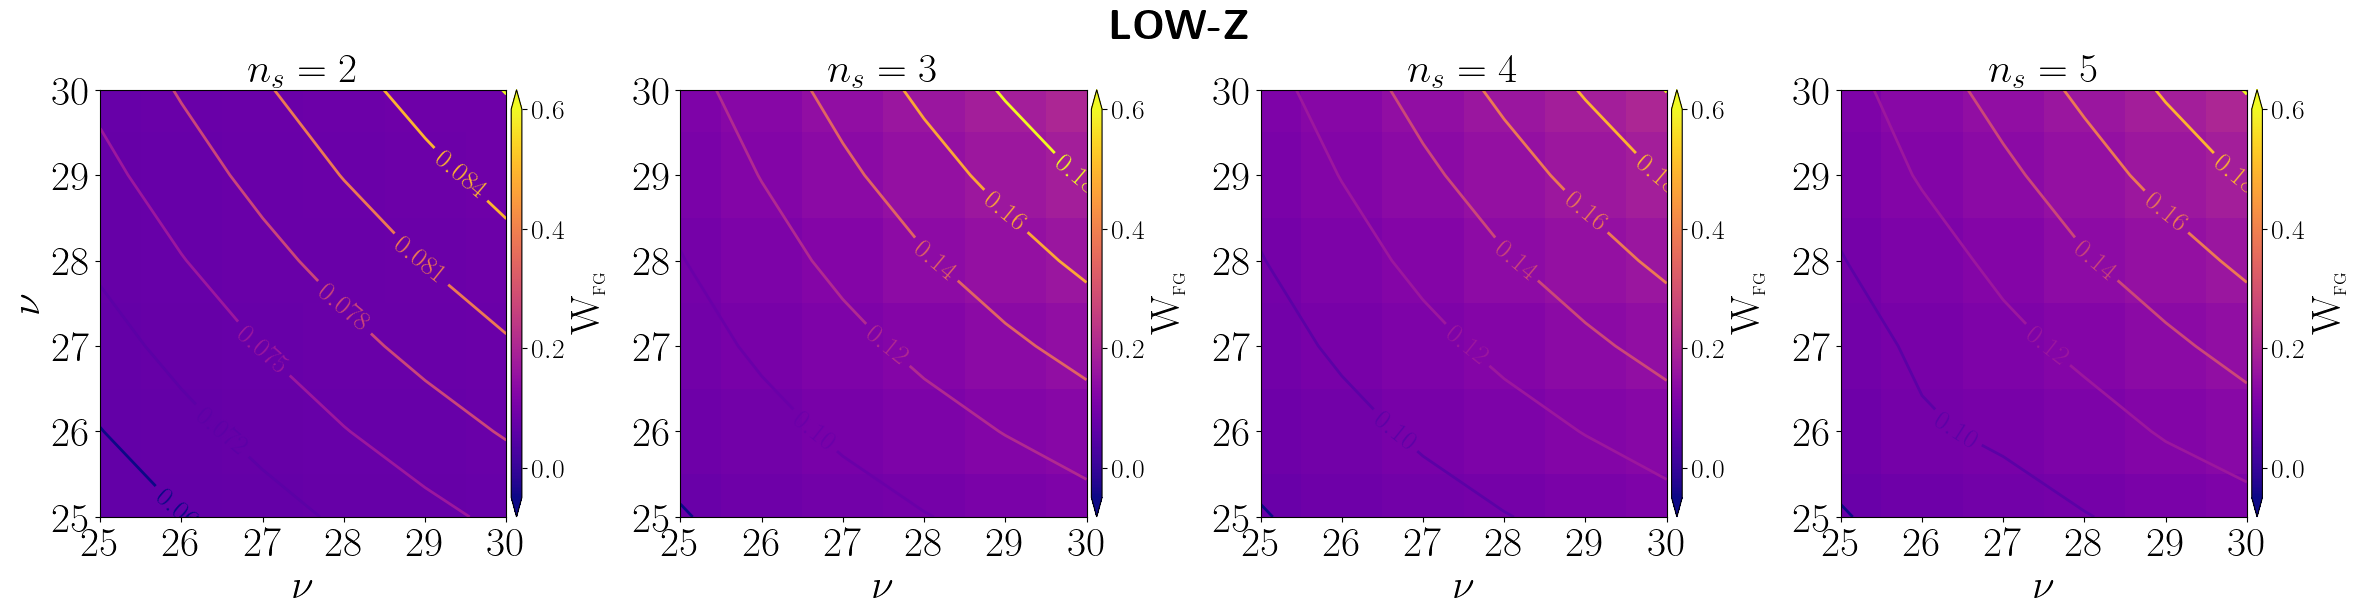

In [8]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),1
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.9, wspace=0.2,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_lowz)
cticks   = bins_lowz+1#[1,10,20,30]
CMAP = 'plasma'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])[bins_lowz.min():bins_lowz.max()+1,bins_lowz.min():bins_lowz.max()+1]
    x   = bins_lowz+1#np.arange(iWfg.shape[0])+1
    y   = bins_lowz+1#np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP,    vmin=-0.05, vmax=0.6)
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right")
    cbar.set_label(label=r'$\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.tick_params(axis='both', labelsize=30)
axes[0].set_ylabel(r'$\nu$', fontsize=30)    
axes[1].text(x=30.3, y=30.6, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

### PAPER's Figure 9

#### - Row 48

'/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch47__45_50.png'

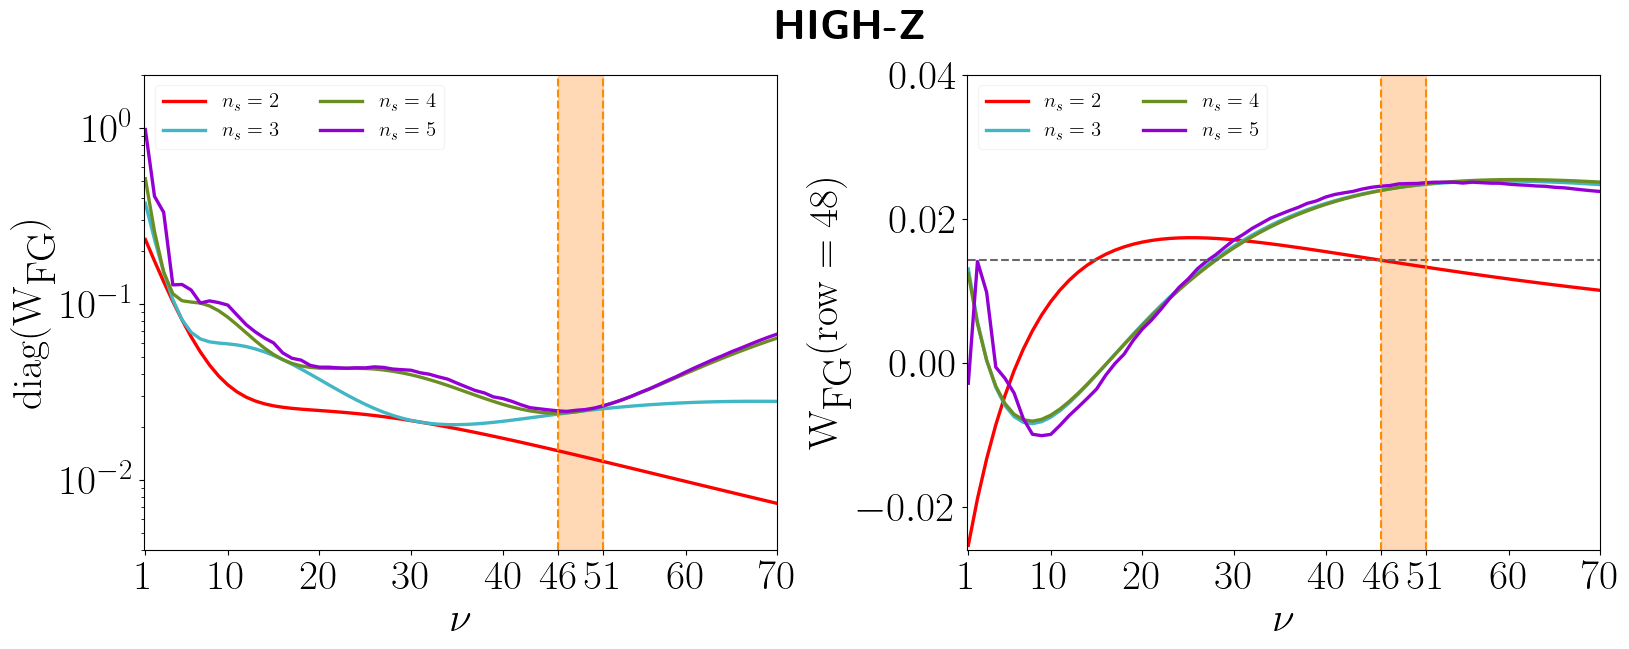

In [9]:
savefigs = True
############################################################################
i=47   ##row
nch    = 70
nu_min = 45
nu_max = 50
#
cticks = [1,10,20,30,40,46,51,60,70]
#
bins_highz = np.arange(nch)[nu_min:nu_max+1]
WFG_dict = dcopy(WFG_dict_highz)
####################################################################
fig, axes = plt.subplots(1,2)#, figsize=(18,6))
plt.subplots_adjust(top=1.1,right=2.4, wspace=0.3, hspace=0.35)
ax = axes[0]
############
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1,np.diag(iWfg),lw=2.4, c=my_cmap(ii),label=r'$n_s ='+'{}$'.format(ins.split('ns')[1]))#,  c='purple')
ax.axvline(x=bins_highz.min()+1, color='darkorange', ls='dashed')
ax.axvline(x=bins_highz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_highz+1, -0.07, 2, color='C1', alpha=0.3)    
####    
ax.set_xscale('linear'); ax.set_yscale('log')
ax.set_xlim(0.9,30)
ax.set_ylim(0.4e-2,2)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{diag(W}_{\textrm{FG}})$', fontsize=30)
ax.set_xlabel(r'$\nu$', fontsize=30)
ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####################################################################
ax = axes[1]
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1, iWfg[i,:]  , label=r'$n_s ='+'{}$'.format( ins.split('ns')[1]),  c=my_cmap(ii), lw=2.4)
ax.plot(np.arange(nch)+1, np.ones(nch)/nch, ls='dashed', c='dimgrey')    
ax.axvline(x=bins_highz.min()+1, color='darkorange', ls='dashed')
ax.axvline(x=bins_highz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_highz+1, -0.08, 1, color='C1', alpha=0.3)    
####    
ax.set_xlim(0.9,nch)
ax.set_ylim(-0.026,0.04)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{W}_{\textrm{FG}} (\textrm{row}' + '={})$'.format(i+1) , fontsize=30)
ax.set_xlabel(r'$\nu$', fontsize=30)
ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####
ax.text(x=-20, y=0.45e-1, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch47__45_50.png'

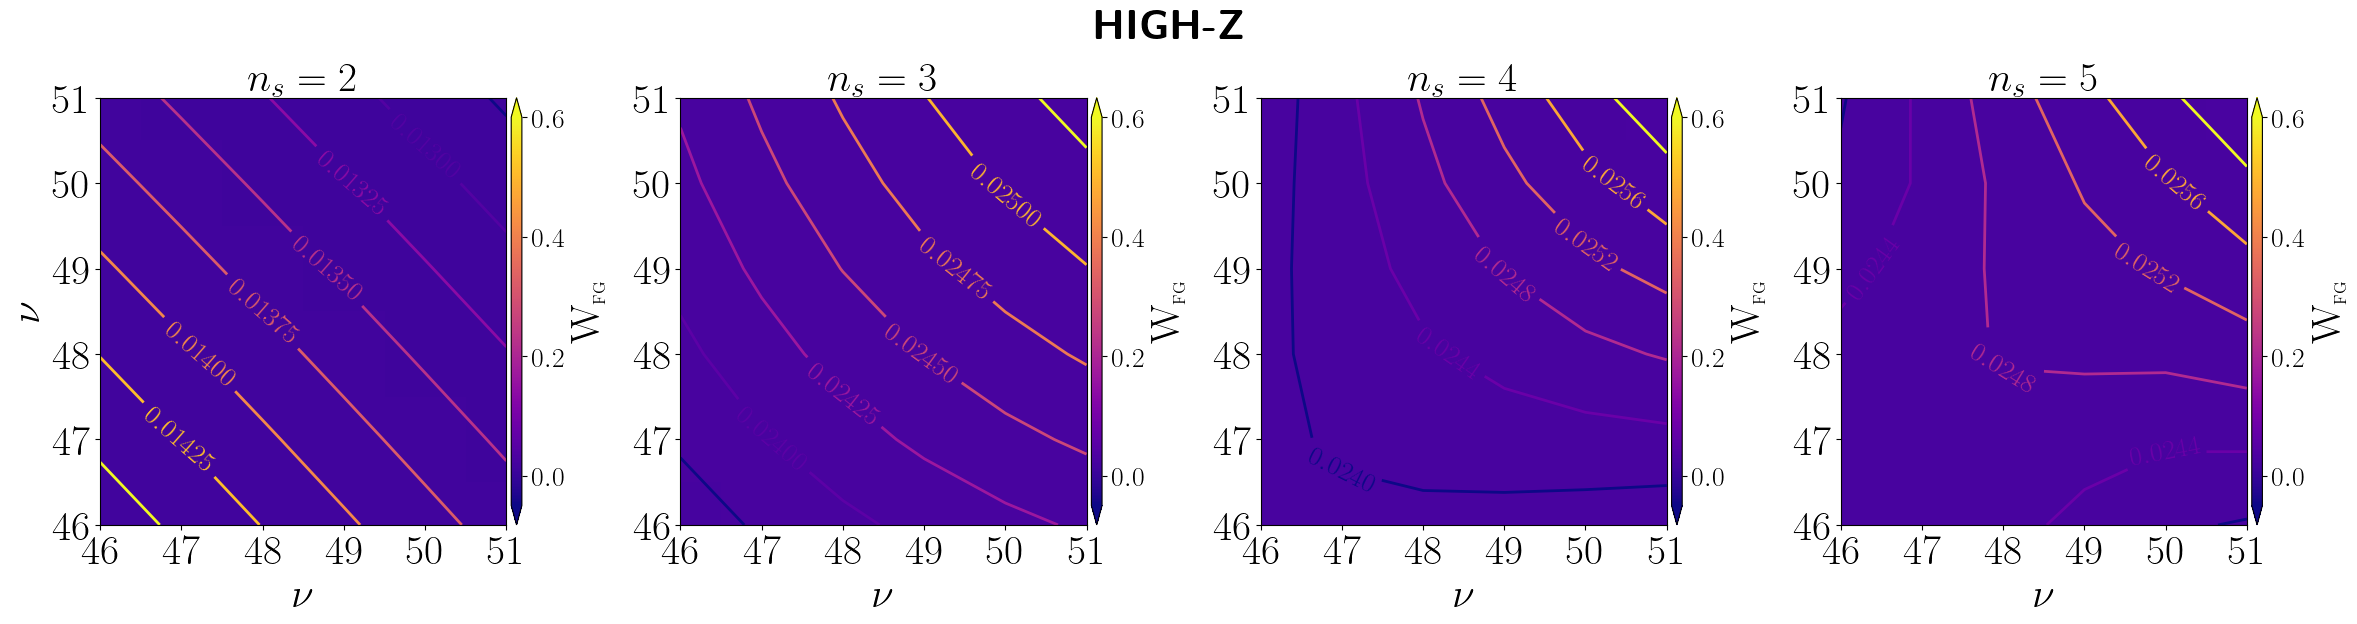

In [10]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),1
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.9, wspace=0.2,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_highz)
cticks   = bins_highz+1#[1,10,20,30]
CMAP = 'plasma'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])[bins_highz.min():bins_highz.max()+1,bins_highz.min():bins_highz.max()+1]
    x   = bins_highz+1#np.arange(iWfg.shape[0])+1
    y   = bins_highz+1#np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP,    vmin=-0.05, vmax=0.6)
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right")
    cbar.set_label(label=r'$\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.tick_params(axis='both', labelsize=30)
axes[0].set_ylabel(r'$\nu$', fontsize=30)    
axes[1].text(x=51.1, y=51.7, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

#### - Row 70

'/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch69__64_69.png'

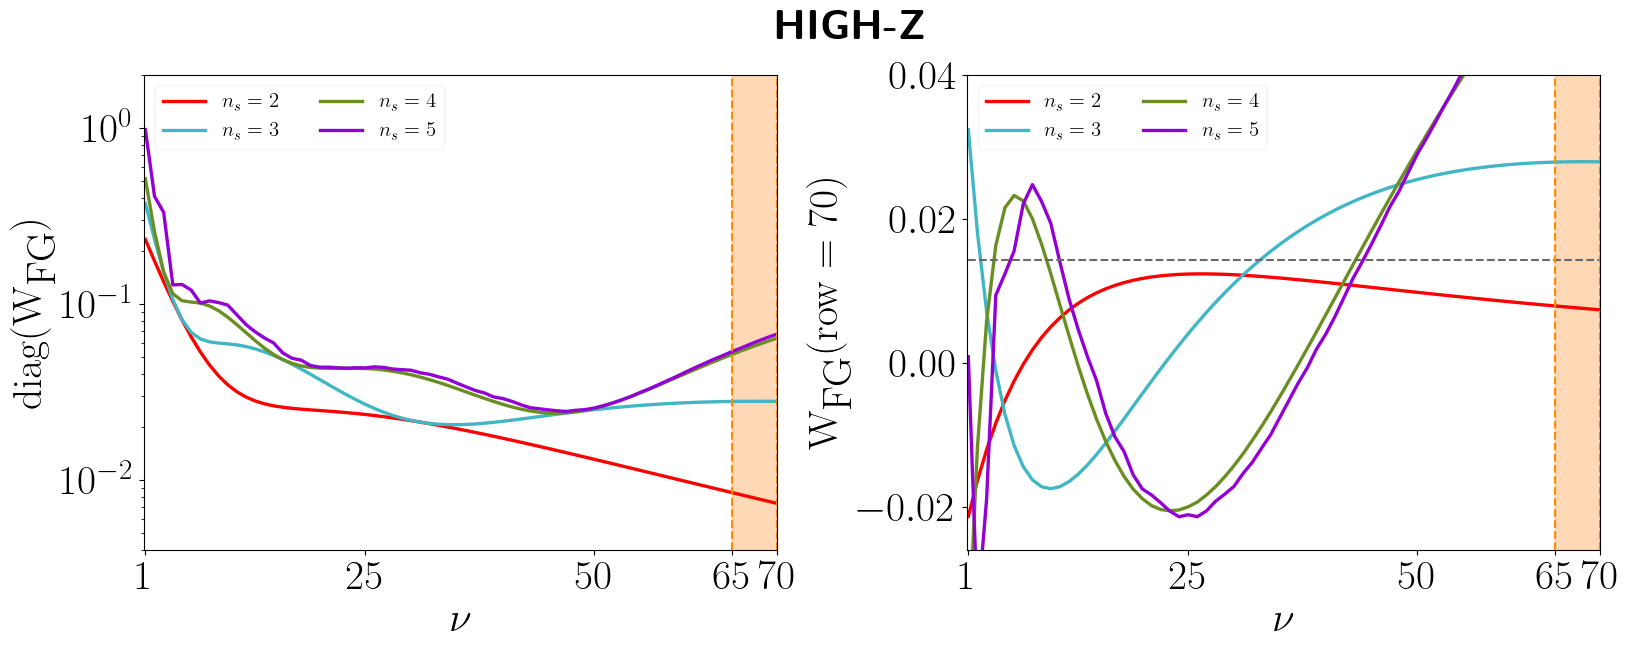

In [11]:
savefigs = True
############################################################################
i=69   ##row
nch    = 70
nu_min = 65-1
nu_max = 70-1
#
cticks = [1,25,50,65,70]
#
bins_highz = np.arange(nch)[nu_min:nu_max+1]
WFG_dict = dcopy(WFG_dict_highz)
####################################################################
fig, axes = plt.subplots(1,2)#, figsize=(18,6))
plt.subplots_adjust(top=1.1,right=2.4, wspace=0.3, hspace=0.35)
ax = axes[0]
############
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1,np.diag(iWfg),lw=2.4, c=my_cmap(ii),label=r'$n_s ='+'{}$'.format(ins.split('ns')[1]))#,  c='purple')
ax.axvline(x=bins_highz.min()+1, color='darkorange', ls='dashed')
ax.axvline(x=bins_highz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_highz+1, -0.07, 2, color='C1', alpha=0.3)    
####    
ax.set_xscale('linear'); ax.set_yscale('log')
ax.set_xlim(0.9,30)
ax.set_ylim(0.4e-2,2)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{diag(W}_{\textrm{FG}})$', fontsize=30)
ax.set_xlabel(r'$\nu$', fontsize=30)
ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####################################################################
ax = axes[1]
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1, iWfg[i,:]  , label=r'$n_s ='+'{}$'.format( ins.split('ns')[1]),  c=my_cmap(ii), lw=2.4)
ax.plot(np.arange(nch)+1, np.ones(nch)/nch, ls='dashed', c='dimgrey')    
ax.axvline(x=bins_highz.min()+1, color='darkorange', ls='dashed')
ax.axvline(x=bins_highz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_highz+1, -0.08, 1, color='C1', alpha=0.3)    
####    
ax.set_xlim(0.9,nch)
ax.set_ylim(-0.026,0.04)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{W}_{\textrm{FG}} (\textrm{row}' + '={})$'.format(i+1) , fontsize=30)
ax.set_xlabel(r'$\nu$', fontsize=30)
ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####
ax.text(x=-20, y=0.45e-1, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch69__64_69.png'

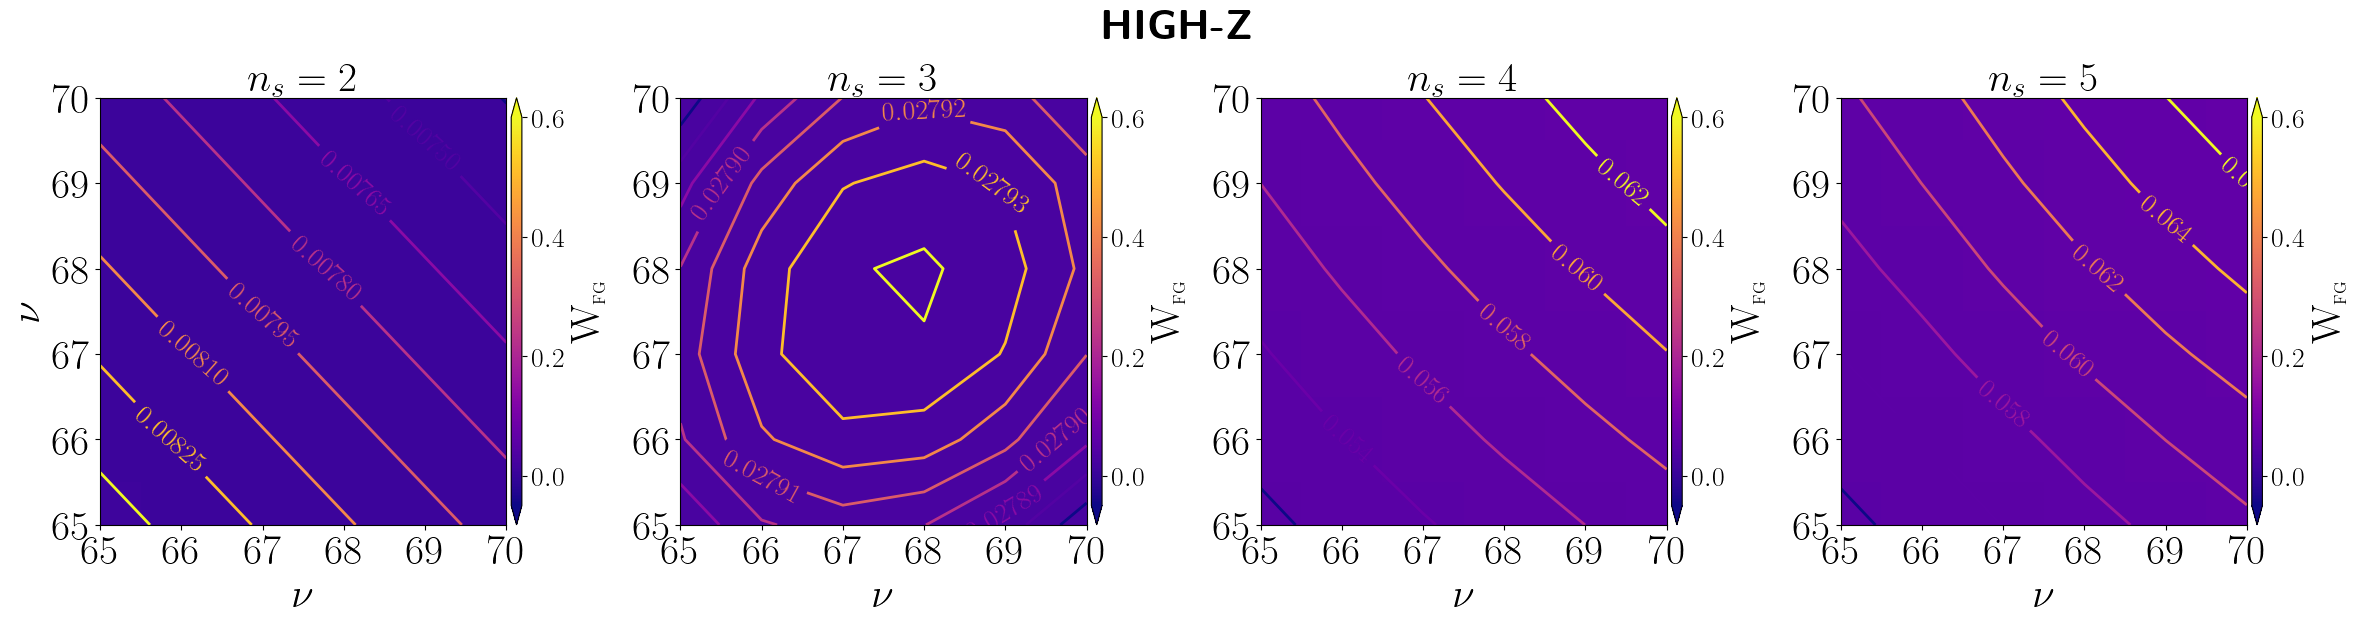

In [12]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),1
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.9, wspace=0.2,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_highz)
cticks   = bins_highz+1#[1,10,20,30]
CMAP = 'plasma'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])[bins_highz.min():bins_highz.max()+1,bins_highz.min():bins_highz.max()+1]
    x   = bins_highz+1#np.arange(iWfg.shape[0])+1
    y   = bins_highz+1#np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP,    vmin=-0.05, vmax=0.6)
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right")
    cbar.set_label(label=r'$\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.tick_params(axis='both', labelsize=30)
axes[0].set_ylabel(r'$\nu$', fontsize=30)    
axes[1].text(x=70.2, y=70.7, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname